In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

#### Etiquetar las imagenes

In [35]:
data_directory = pathlib.Path('./dataset/train/')
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


#### Cargar los datos

In [36]:
# Cargar los datos
data_gen = ImageDataGenerator(rescale=1./255,
                              horizontal_flip = False,
                              validation_split=0.2)

train_dir = "./dataset/train"
test_dir = "./dataset/test"

path = "/dataset"

train_data = data_gen.flow_from_directory("./dataset/train/", 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'sparse')
val_data = data_gen.flow_from_directory("./dataset/test/", 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'sparse')

Found 2684 images belonging to 7 classes.
Found 160 images belonging to 7 classes.


In [37]:
def plot_random_images(num):
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(5, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == num+1:
            break

    plt.tight_layout()       
    plt.show()

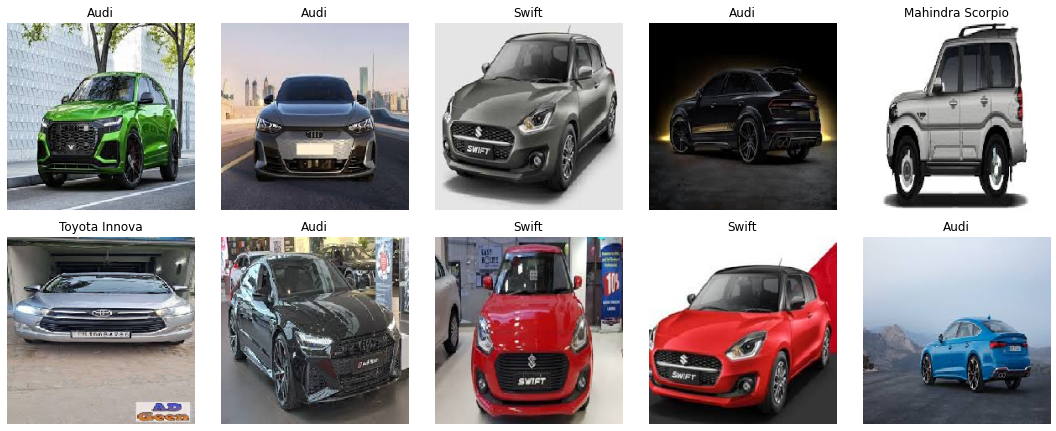

In [38]:
plot_random_images(10)

In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                #    width_shift_range = 0.2,
                                #    height_shift_range = 0.2,
                                #    shear_range = 0.3,
								#    zoom_range = 0.3,
									horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  horizontal_flip=True)

In [40]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

test_generator = test_datagen.flow_from_directory(
							train_dir,
							target_size = (256, 256),
							batch_size = 1,
							class_mode ='binary')

Found 3352 images belonging to 7 classes.
Found 3352 images belonging to 7 classes.


<Figure size 432x288 with 0 Axes>

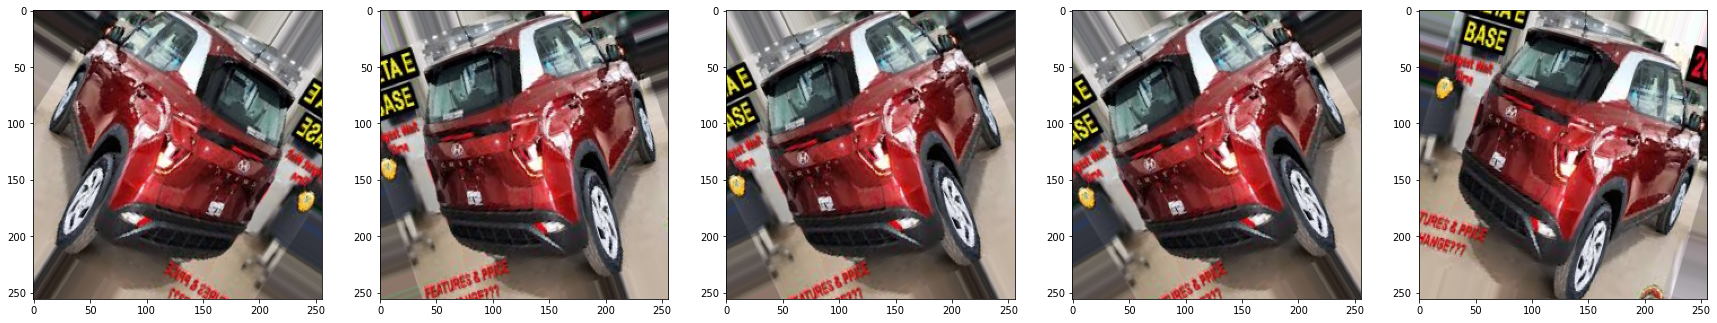

In [41]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [54]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (128, 128),
                          							batch_size = 8,
                                                    class_mode ='sparse')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(128,128),
                                                  batch_size = 8,
                                                  class_mode="sparse")

Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


(8, 128, 128, 3)
[1. 6. 6. 2. 3. 0. 6. 1.]


<Figure size 432x288 with 0 Axes>

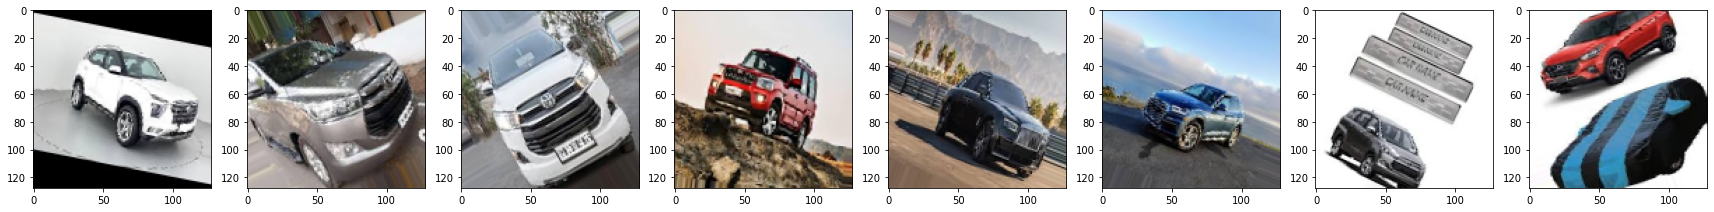

In [55]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

# Modelo 1

In [56]:
model = Sequential()

# First convolution layer and pooling
model.add(layers.Convolution2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(layers.Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(layers.Flatten())

# Adding a fully connected layer
model.add(layers.Dense(units=96, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=7, activation='softmax')) # softmax for more than 2

In [57]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [58]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 50)

Epoch 1/50
419/419 [==============================] - 191s 454ms/step - loss: 1.8703 - acc: 0.2581 - val_loss: 1.7751 - val_acc: 0.3296
Epoch 2/50
419/419 [==============================] - 203s 486ms/step - loss: 1.7472 - acc: 0.3407 - val_loss: 1.6169 - val_acc: 0.4034
Epoch 3/50
419/419 [==============================] - 103s 246ms/step - loss: 1.6522 - acc: 0.3917 - val_loss: 1.5039 - val_acc: 0.4416
Epoch 4/50
419/419 [==============================] - 142s 339ms/step - loss: 1.5936 - acc: 0.4126 - val_loss: 1.4521 - val_acc: 0.4859
Epoch 5/50
419/419 [==============================] - 200s 479ms/step - loss: 1.4905 - acc: 0.4570 - val_loss: 1.3308 - val_acc: 0.5080
Epoch 6/50
419/419 [==============================] - 178s 426ms/step - loss: 1.4407 - acc: 0.4705 - val_loss: 1.3578 - val_acc: 0.4982
Epoch 7/50
419/419 [==============================] - 275s 659ms/step - loss: 1.3690 - acc: 0.5092 - val_loss: 1.2574 - val_acc: 0.5535
Epoch 8/50
419/419 [============================

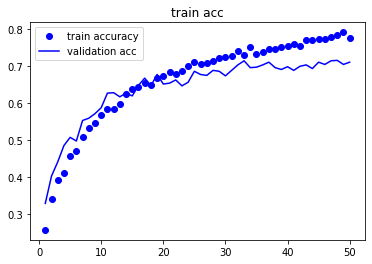

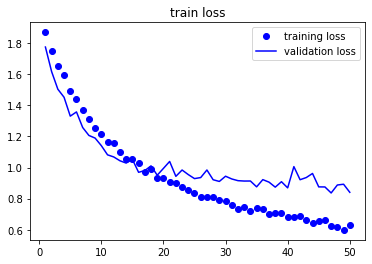

In [64]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'bo',label='train accuracy')
plt.plot(epochs, val_acc,'b',label='validation acc')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('train loss')
plt.legend()

plt.show()

In [60]:
model.save("model1.h5")

In [61]:
test_loss, test_acc = model.evaluate(test_generator, steps = 4)
print('\ntest acc :\n', test_acc)
print('\ntest loss :\n', test_loss)

4/4 [==============================] - 1s 176ms/step - loss: 1.1729 - acc: 0.6875

test acc :
 0.6875

test loss :
 1.1729316711425781
